# Candidatos das eleições 2018

Dados demográficos e declaração de bens de candidatos às eleições de 2018.

In [1]:
import pandas
import parse_Originais as parse_module
from importlib import reload
reload(parse_module)

/Users/tiago_batalhao/Envs/Mulheres/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<module 'parse_Originais' from '/Users/tiago_batalhao/Desktop/Eleicoes_Mulheres/parse_Originais.py'>

In [2]:
dados_candidatos = parse_module.parse_Candidatos(pandas.read_csv('Arquivos_parseados/Dados_candidatos.csv.gz'))
#candidatos[candidatos['NR_CPF_CANDIDATO']==71347372172].T
dados_bens = parse_module.parse_Bens(pandas.read_csv('Arquivos_parseados/Dados_bens.csv.gz'))
dados_coligacao = pandas.read_csv('Arquivos_parseados/Dados_coligacao.csv.gz')
dados_vagas = pandas.read_csv('Arquivos_parseados/Dados_vagas.csv.gz')
dados_cassacao = pandas.read_csv('Arquivos_parseados/Dados_cassacao.csv.gz')

In [6]:
bens_candidatos = dados_candidatos[[
    'SQ_CANDIDATO',
    'SG_UF',
    'DS_CARGO',
    'NM_CANDIDATO',
    'DS_GENERO'
]].merge(
    dados_bens.groupby('SQ_CANDIDATO', as_index=False).agg({
        'VR_BEM_CANDIDATO': 'sum',
    }),
    how='left',
    on='SQ_CANDIDATO'
)

In [10]:
bens_candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27887 entries, 0 to 27886
Data columns (total 6 columns):
SQ_CANDIDATO        27887 non-null int64
SG_UF               27887 non-null object
DS_CARGO            27887 non-null object
NM_CANDIDATO        27887 non-null object
DS_GENERO           27887 non-null object
VR_BEM_CANDIDATO    17292 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ MB


In [14]:
ricos_h = bens_candidatos[bens_candidatos['DS_GENERO']=='MASCULINO'].sort_values(by='VR_BEM_CANDIDATO', ascending=False)
ricos_m = bens_candidatos[bens_candidatos['DS_GENERO']=='FEMININO'].sort_values(by='VR_BEM_CANDIDATO', ascending=False)

/Users/tiago_batalhao/Envs/Mulheres/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


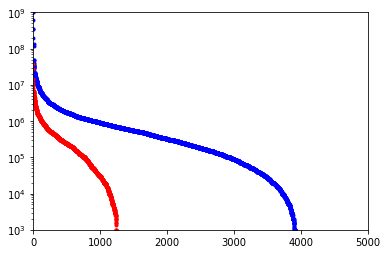

In [33]:
import pylab as py
fig, ax = py.subplots()
yy = ricos_h[ricos_h['DS_CARGO']=='DEPUTADO FEDERAL']['VR_BEM_CANDIDATO']
xx = range(len(yy))
ax.plot(xx, yy, 'b.')
yy = ricos_m[ricos_m['DS_CARGO']=='DEPUTADO FEDERAL']['VR_BEM_CANDIDATO']
xx = range(len(yy))
ax.plot(xx, yy, 'r.')
ax.set_yscale('log')
ax.set_xlim(0,5000)
ax.set_ylim(1e3, 1e9)
fig.show()

/Users/tiago_batalhao/Envs/Mulheres/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


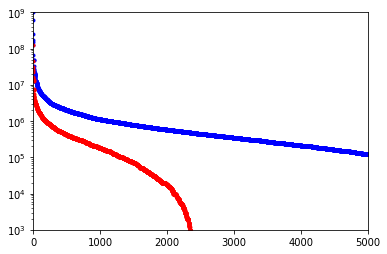

In [34]:
import pylab as py
fig, ax = py.subplots()
yy = ricos_h[ricos_h['DS_CARGO']=='DEPUTADO ESTADUAL']['VR_BEM_CANDIDATO']
xx = range(len(yy))
ax.plot(xx, yy, 'b.')
yy = ricos_m[ricos_m['DS_CARGO']=='DEPUTADO ESTADUAL']['VR_BEM_CANDIDATO']
xx = range(len(yy))
ax.plot(xx, yy, 'r.')
ax.set_yscale('log')
ax.set_xlim(0,5000)
ax.set_ylim(1e3, 1e9)
fig.show()

In [35]:
candidatos_h = len(ricos_h)
renda_h = ricos_h['VR_BEM_CANDIDATO'].sum()
candidatos_m = len(ricos_m)
renda_m = ricos_m['VR_BEM_CANDIDATO'].sum()
print(candidatos_m / (candidatos_m + candidatos_h))
print(renda_m / (renda_h + renda_m))

0.3069530605658551
0.08704184496656941


In [40]:
ricos_hh = ricos_h[py.isfinite(ricos_h['VR_BEM_CANDIDATO'])]
ricos_mm = ricos_m[py.isfinite(ricos_m['VR_BEM_CANDIDATO'])]
print(ricos_hh['VR_BEM_CANDIDATO'].median())
print(ricos_mm['VR_BEM_CANDIDATO'].median())

266575.62
150000.0


In [48]:
py.percentile(ricos_hh['VR_BEM_CANDIDATO'], 5) / 1e3

7.0

In [56]:
boundaries = [
    1e4, 2e4, 5e4,
    1e5, 2e5, 5e5,
    1e6, 2e6, 5e6,
]
labels = [
    'Até 10k',
    'De 10k a 20k',
    'De 20k a 50k',
    'De 50k a 100k',
    'De 100k a 200k',
    'De 200k a 500k',
    'De 500k a 1M',
    'De 1M a 2M',
    'De 2M a 5M',
    'Mais de 5M',
]
def histogram_like(sequence):
    counts = [sum(x<boundaries[0] for x in sequence)]
    for i in range(len(boundaries) - 1):
        counts.append(sum((x<boundaries[i+1])&(x>=boundaries[i]) for x in sequence))
    counts += [sum(x>=boundaries[-1] for x in sequence)]
    return counts
counts_h = histogram_like(ricos_hh['VR_BEM_CANDIDATO'])
counts_m = histogram_like(ricos_mm['VR_BEM_CANDIDATO'])

[Text(0,0,'Até 10k'),
 Text(0,0,'De 10k a 20k'),
 Text(0,0,'De 20k a 50k'),
 Text(0,0,'De 50k a 100k'),
 Text(0,0,'De 100k a 200k'),
 Text(0,0,'De 200k a 500k'),
 Text(0,0,'De 500k a 1M'),
 Text(0,0,'De 1M a 2M'),
 Text(0,0,'De 2M a 5M'),
 Text(0,0,'Mais de 5M')]

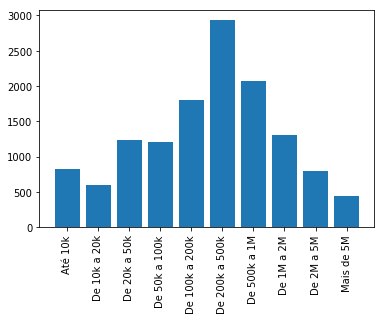

In [59]:
fig, ax = py.subplots()
yy = counts_h
xx = range(len(yy))
ax.bar(xx, yy)
ax.set_xticks(xx)
ax.set_xticklabels(labels, rotation='vertical')

<BarContainer object of 10 artists>

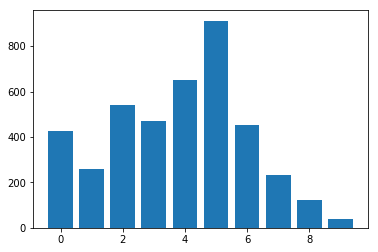

In [54]:
fig, ax = py.subplots()
yy = counts_m
xx = range(len(yy))
ax.bar(xx, yy)

In [62]:
df = pandas.DataFrame()
df['Homens'] = counts_h
df['Mulheres'] = counts_m
df.index = labels


In [71]:
df['Fracao'] = df['Mulheres'] / (df['Mulheres']+df['Homens'])

[Text(0,0,'Até 10k'),
 Text(0,0,'De 10k a 20k'),
 Text(0,0,'De 20k a 50k'),
 Text(0,0,'De 50k a 100k'),
 Text(0,0,'De 100k a 200k'),
 Text(0,0,'De 200k a 500k'),
 Text(0,0,'De 500k a 1M'),
 Text(0,0,'De 1M a 2M'),
 Text(0,0,'De 2M a 5M'),
 Text(0,0,'Mais de 5M')]

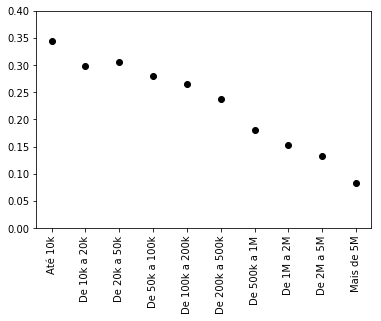

In [73]:
fig, ax = py.subplots()
yy = df['Fracao']
xx = range(len(yy))
ax.plot(xx, yy, 'ko')
ax.set_xticks(xx)
ax.set_ylim(0,0.4)
ax.set_xticklabels(labels, rotation='vertical')

In [78]:
dff= pandas.DataFrame()
dff['this'] = df['Homens']/df['Homens'].sum()

In [84]:
bens_tipo = dados_bens.groupby('DS_TIPO_BEM_CANDIDATO', as_index=False).agg({
    'VR_BEM_CANDIDATO': 'sum',
})

In [95]:
bens_tipo['frac'] = bens_tipo['VR_BEM_CANDIDATO'] / bens_tipo['VR_BEM_CANDIDATO'].sum()
bens_tipo = bens_tipo.sort_values(by='VR_BEM_CANDIDATO', ascending=False)
for x in bens_tipo['DS_TIPO_BEM_CANDIDATO']: print(x)
bens_tipo

Casa
Apartamento
Quotas ou quinhões de capital
Outros bens imóveis
Terreno
Veículo automotor terrestre: caminhão, automóvel, moto, etc.
Aplicação de renda fixa (CDB, RDB e outros)
OUTROS BENS E DIREITOS
Outras participações societárias
Outras aplicações e Investimentos
Ações (inclusive as provenientes de linha telefônica)
Crédito decorrente de empréstimo
Terra nua
Outros fundos
Dinheiro em espécie - moeda nacional
Depósito bancário em conta corrente no País
Fundo de Longo Prazo e Fundo de Investimentos em Direitos Creditórios (FIDC)
Fundos: Ações, Mútuos de Privatização, Invest. Empresas Emergentes, Invest.Participação e Invest. Índice Mercado
Prédio comercial
VGBL - Vida Gerador de Benefício Livre
Sala ou conjunto
Construção
Outros bens móveis
Prédio residencial
Caderneta de poupança
Bem relacionado com o exercício da atividade autônoma
Depósito bancário em conta corrente no exterior
Benfeitorias
Outros créditos e poupança vinculados
Aeronave
Galpão
Crédito decorrente de alienação
Loj

,DS_TIPO_BEM_CANDIDATO,VR_BEM_CANDIDATO,frac
7,Casa,4.982051e+09,0.197670
1,Apartamento,3.177894e+09,0.126087
43,Quotas ou quinhões de capital,2.876994e+09,0.114149
34,Outros bens imóveis,2.533817e+09,0.100533
46,Terreno,2.374223e+09,0.094201
49,"Veículo automotor terrestre: caminhão, automóv...",1.288962e+09,0.051141
2,"Aplicação de renda fixa (CDB, RDB e outros)",9.234156e+08,0.036638
30,OUTROS BENS E DIREITOS,8.602644e+08,0.034132
33,Outras participações societárias,8.601219e+08,0.034127
32,Outras aplicações e Investimentos,6.177819e+08,0.024511


In [111]:
imovel = [
    'Casa',
    'Apartamento',
    'Outros bens imóveis',
    'Terreno',
    'Terra nua',
    'Prédio comercial',
    'Sala ou conjunto',
    'Construção',
    'Prédio residencial'
]
carro = [
    'Veículo automotor terrestre: caminhão, automóvel, moto, etc.',
    
]
financeiro = [
    'Quotas ou quinhões de capital',
    'Aplicação de renda fixa (CDB, RDB e outros)',
    'Outras participações societárias',
    'Outras aplicações e Investimentos',
    'Ações (inclusive as provenientes de linha telefônica)',
    'Crédito decorrente de empréstimo',
    'Outros fundos',
    'Fundo de Longo Prazo e Fundo de Investimentos em Direitos Creditórios (FIDC)',
    'Fundos: Ações, Mútuos de Privatização, Invest. Empresas Emergentes, Invest.Participação e Invest. Índice Mercado',
    'Ouro, ativo financeiro',
    'Outros créditos e poupança vinculados',
    'Fundo de Curto Prazo',
    'Outros depósitos à vista e numerário',
    'Mercado futuros, de opções e a termo',
]
corrente = [
    'Dinheiro em espécie - moeda nacional',
    'Depósito bancário em conta corrente no País',  
    'Caderneta de poupança',
    'Dinheiro em espécie - moeda estrangeira',
    'Depósito bancário em conta corrente no exterior',
]

In [112]:
reclassificar = {}
for col in imovel:
    reclassificar[col] = 'Imóvel'
for col in carro:
    reclassificar[col] = 'Carro'
for col in financeiro:
    reclassificar[col] = 'Financeiro'
for col in corrente:
    reclassificar[col] = 'Corrente'
bens_tipo['Tipo'] = bens_tipo['DS_TIPO_BEM_CANDIDATO'].apply(lambda x: reclassificar.get(x, 'Outros'))

In [113]:
bens_tipo.groupby('Tipo').sum()

,VR_BEM_CANDIDATO,frac
Tipo,,
Carro,1.288962e+09,0.051141
Corrente,7.586263e+08,0.030100
Financeiro,7.305406e+09,0.289852
Imóvel,1.417180e+10,0.562286
Outros,1.679128e+09,0.066622


In [117]:
dados_bens['Tipo'] = dados_bens['DS_TIPO_BEM_CANDIDATO'].apply(lambda x: reclassificar.get(x, 'Outros'))

In [119]:
bens = dados_bens.groupby(['SQ_CANDIDATO','Tipo'], as_index=False).agg({
    'VR_BEM_CANDIDATO': 'sum',
})

In [134]:
bens_por_tipo = bens.pivot_table('VR_BEM_CANDIDATO', 'SQ_CANDIDATO', 'Tipo').fillna(0)
bens_total = dados_bens.groupby('SQ_CANDIDATO', as_index=False).agg({
    'VR_BEM_CANDIDATO': 'sum',
}).rename({'VR_BEM_CANDIDATO':'Total'}, axis=1)
bens_por_tipo = bens_por_tipo.merge(bens_total,on='SQ_CANDIDATO',how='left')


In [135]:
bens_candidatos_por_tipo = dados_candidatos[[
    'SQ_CANDIDATO',
    'SG_UF',
    'DS_CARGO',
    'NM_CANDIDATO',
    'DS_GENERO'
]].merge(
    bens_por_tipo,
    how='left',
    on='SQ_CANDIDATO'
)


In [146]:
bens_candidatos_por_tipo['Disponivel'] = bens_candidatos_por_tipo.apply(lambda x:
    x['Financeiro']+x['Corrente']+x['Outros'], axis=1).fillna(0)
bens_candidatos_por_tipo = bens_candidatos_por_tipo[bens_candidatos_por_tipo['Total']>0]

In [151]:
sum(bens_candidatos_por_tipo['Disponivel']>0)

9683

In [171]:
boundaries = [
    1e-3,
    1e3, 2e3, 5e3,
    1e4, 2e4, 5e4,
    1e5, 2e5, 5e5,
    1e6, 2e6, 5e6,
]
labels = [
    '0',
    'Até 1k',
    'De 1k a 2k',
    'De 2k a 5k',
    'De 5k a 10k',
    'De 10k a 20k',
    'De 20k a 50k',
    'De 50k a 100k',
    'De 100k a 200k',
    'De 200k a 500k',
    'De 500k a 1M',
    'De 1M a 2M',
    'De 2M a 5M',
    'Mais de 5M',
]
def histogram_like(sequence):
    counts = [sum(x<boundaries[0] for x in sequence)]
    for i in range(len(boundaries) - 1):
        counts.append(sum((x<boundaries[i+1])&(x>=boundaries[i]) for x in sequence))
    counts += [sum(x>=boundaries[-1] for x in sequence)]
    return counts
df = pandas.DataFrame()
df['M'] = histogram_like(bens_candidatos_por_tipo[bens_candidatos_por_tipo['DS_GENERO']=='FEMININO']['Disponivel'])
df['H'] = histogram_like(bens_candidatos_por_tipo[bens_candidatos_por_tipo['DS_GENERO']=='MASCULINO']['Disponivel'])
df.index=labels

In [177]:
df['Mfrac'] = df['M']/df['M'].iloc[1:].sum()
df['Hfrac'] = df['H']/df['H'].iloc[1:].sum()

In [183]:
df[['Mfrac']]

,Mfrac
0,1.107234
Até 1k,0.086198
De 1k a 2k,0.038481
De 2k a 5k,0.104156
De 5k a 10k,0.093381
De 10k a 20k,0.101077
De 20k a 50k,0.145716
De 50k a 100k,0.131862
De 100k a 200k,0.097999
De 200k a 500k,0.098512


In [194]:
cands = bens_candidatos_por_tipo[
    (bens_candidatos_por_tipo['Total']>1e5)|
    (bens_candidatos_por_tipo['Disponivel']>100e10)
]

In [195]:
cands_h = sum(cands['DS_GENERO']=='MASCULINO')
cands_m = sum(cands['DS_GENERO']=='FEMININO')
print(cands_m/(cands_m+cands_h))

0.20421561852107808


In [197]:
bens_candidatos_por_tipo.sort_values(by='Total',ascending=False)

,SQ_CANDIDATO,SG_UF,DS_CARGO,NM_CANDIDATO,DS_GENERO,Carro,Corrente,Financeiro,Imóvel,Outros,Total,Disponivel
23229,250000600423,SP,DEPUTADO FEDERAL,EVERALDO LISBOA DE BRITO,MASCULINO,2.200670e+07,0.00,0.000000e+00,1.180000e+09,0.000000e+00,1.202007e+09,0.000000e+00
25156,250000600426,SP,DEPUTADO FEDERAL,FERNANDO CESAR DE CAMARGO ROSSETO,MASCULINO,6.550000e+07,0.00,0.000000e+00,8.516000e+08,1.012840e+08,1.018384e+09,1.012840e+08
15117,270000626128,TO,DEPUTADO FEDERAL,ANTÔNIO QUEOPS VASCONCELOS MIRANDA,MASCULINO,0.000000e+00,0.00,0.000000e+00,1.000550e+09,0.000000e+00,1.000550e+09,0.000000e+00
15267,10000600154,AC,DEPUTADO ESTADUAL,COSME DE SOUZA LEITE,MASCULINO,3.000000e+05,0.00,0.000000e+00,1.000000e+09,0.000000e+00,1.000300e+09,0.000000e+00
936,70000613826,DF,SENADOR,FERNANDO DE CASTRO MARQUES,MASCULINO,1.540000e+05,6921.48,6.538679e+08,1.232881e+07,1.595500e+06,6.679532e+08,6.554704e+08
22192,250000600414,SP,DEPUTADO FEDERAL,BEETHOVEN ELIAS DE OLIVEIRA,MASCULINO,0.000000e+00,0.00,0.000000e+00,6.000000e+08,0.000000e+00,6.000000e+08,0.000000e+00
26707,210000615830,RS,DEPUTADO ESTADUAL,JACSON GIMENES SANTOS,MASCULINO,0.000000e+00,0.00,0.000000e+00,6.000000e+08,0.000000e+00,6.000000e+08,0.000000e+00
11496,280000607640,BR,PRESIDENTE,JOÃO DIONISIO FILGUEIRA BARRETO AMOEDO,MASCULINO,6.210000e+05,68954.80,3.938740e+08,2.446099e+07,6.041549e+06,4.250665e+08,3.999845e+08
15112,270000618818,TO,2º SUPLENTE,OGARI DE CASTRO PACHECO,MASCULINO,1.700000e+05,385120.18,4.059776e+08,1.201918e+06,0.000000e+00,4.077346e+08,4.063627e+08
16822,110000612720,MT,VICE-GOVERNADOR,OTAVIANO OLAVO PIVETTA,MASCULINO,3.050000e+05,2218.41,3.393219e+08,3.967242e+06,3.586007e+07,3.794564e+08,3.751842e+08


/Users/tiago_batalhao/Envs/Mulheres/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(1000.0, 1000000000.0)

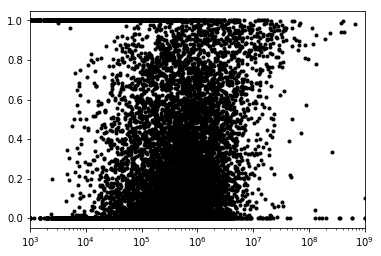

In [200]:
bens_candidatos_por_tipo['Disponivel_frac'] = bens_candidatos_por_tipo['Disponivel']/bens_candidatos_por_tipo['Total']
fig, ax = py.subplots()
xx = bens_candidatos_por_tipo['Total']
yy = bens_candidatos_por_tipo['Disponivel_frac']
ax.plot(xx, yy, 'k.')
ax.set_xscale('log')
ax.set_xlim(1e3,1e9)

In [213]:
bens_candidatos_por_tipo.sort_values(by='Total',ascending=False)

,SQ_CANDIDATO,SG_UF,DS_CARGO,NM_CANDIDATO,DS_GENERO,Carro,Corrente,Financeiro,Imóvel,Outros,Total,Disponivel,Disponivel_frac
23229,250000600423,SP,DEPUTADO FEDERAL,EVERALDO LISBOA DE BRITO,MASCULINO,2.200670e+07,0.00,0.000000e+00,1.180000e+09,0.000000e+00,1.202007e+09,0.000000e+00,0.000000
25156,250000600426,SP,DEPUTADO FEDERAL,FERNANDO CESAR DE CAMARGO ROSSETO,MASCULINO,6.550000e+07,0.00,0.000000e+00,8.516000e+08,1.012840e+08,1.018384e+09,1.012840e+08,0.099456
15117,270000626128,TO,DEPUTADO FEDERAL,ANTÔNIO QUEOPS VASCONCELOS MIRANDA,MASCULINO,0.000000e+00,0.00,0.000000e+00,1.000550e+09,0.000000e+00,1.000550e+09,0.000000e+00,0.000000
15267,10000600154,AC,DEPUTADO ESTADUAL,COSME DE SOUZA LEITE,MASCULINO,3.000000e+05,0.00,0.000000e+00,1.000000e+09,0.000000e+00,1.000300e+09,0.000000e+00,0.000000
936,70000613826,DF,SENADOR,FERNANDO DE CASTRO MARQUES,MASCULINO,1.540000e+05,6921.48,6.538679e+08,1.232881e+07,1.595500e+06,6.679532e+08,6.554704e+08,0.981312
22192,250000600414,SP,DEPUTADO FEDERAL,BEETHOVEN ELIAS DE OLIVEIRA,MASCULINO,0.000000e+00,0.00,0.000000e+00,6.000000e+08,0.000000e+00,6.000000e+08,0.000000e+00,0.000000
26707,210000615830,RS,DEPUTADO ESTADUAL,JACSON GIMENES SANTOS,MASCULINO,0.000000e+00,0.00,0.000000e+00,6.000000e+08,0.000000e+00,6.000000e+08,0.000000e+00,0.000000
11496,280000607640,BR,PRESIDENTE,JOÃO DIONISIO FILGUEIRA BARRETO AMOEDO,MASCULINO,6.210000e+05,68954.80,3.938740e+08,2.446099e+07,6.041549e+06,4.250665e+08,3.999845e+08,0.940993
15112,270000618818,TO,2º SUPLENTE,OGARI DE CASTRO PACHECO,MASCULINO,1.700000e+05,385120.18,4.059776e+08,1.201918e+06,0.000000e+00,4.077346e+08,4.063627e+08,0.996635
16822,110000612720,MT,VICE-GOVERNADOR,OTAVIANO OLAVO PIVETTA,MASCULINO,3.050000e+05,2218.41,3.393219e+08,3.967242e+06,3.586007e+07,3.794564e+08,3.751842e+08,0.988741


In [220]:
this = dados_bens[dados_bens['SQ_CANDIDATO']==250000606209].sort_values(by='VR_BEM_CANDIDATO')
this

,GERACAO,ATUALIZACAO,SQ_CANDIDATO,ANO_ELEICAO,DS_TIPO_BEM_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO,Tipo
37654,2018-08-20 15:14:51,2018-08-20 14:37:01,250000606209,2018,Caderneta de poupança,#NULO#,0.2,Corrente
